In [3]:
import os
from datasets import DatasetDict, Features, Array3D, Value

def load_custom_tiff_dataset(dataset_name, data_dir):
    """
    Load a custom dataset containing TIFF images using the datasets library.

    Parameters:
        dataset_name (str): Name of the custom dataset.
        data_dir (str): Path to the root directory containing the TIFF images.

    Returns:
        datasets.DatasetDict: A dictionary-like object containing the loaded dataset.
    """
    # Get the list of image files in the data directory
    image_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]

    # Define the dataset's features (assuming all images are of the same size)
    features = Features({"image": Array3D(shape=(1024, 1024, len(image_files)), dtype='uint8')})

    # Load the data into a dictionary-like object
    dataset_dict = DatasetDict(
        {
            'train': {
                'description': "Custom dataset containing TIFF images.",
                'features': features,
                'num_rows': len(image_files),  # Number of examples in the dataset
                'split': 'train',  # Name of the split (optional)
                'image_files': image_files,  # List of image filenames (optional)
                'data_dir': data_dir,  # Path to the root directory containing the images (optional)
            }
        }
    )

    return dataset_dict

# # Example usage:
# dataset_name = "custom_tiff_dataset"  # Replace with your custom dataset name
# data_dir = "path/to/root_directory"  # Replace with the path to your root directory
# custom_tiff_dataset = load_custom_tiff_dataset(dataset_name, data_dir)

# # Access the loaded dataset using custom_tiff_dataset['train']


In [10]:
# Example usage:
path_to_dataset = "/Users/eilaarich-landkof-stanford/Documents/Code/csiseminar/project/dataset"

dataset_name = "custom_tiff_dataset"  # Replace with your custom dataset name
data_dir = path_to_dataset
custom_tiff_dataset = load_custom_tiff_dataset(dataset_name, data_dir)

# Access the loaded dataset using custom_tiff_dataset['train']


In [13]:
custom_tiff_dataset['train']

{'description': 'Custom dataset containing TIFF images.',
 'features': {'image': Array3D(shape=(1024, 1024, 0), dtype='uint8', id=None)},
 'num_rows': 0,
 'split': 'train',
 'image_files': [],
 'data_dir': '/Users/eilaarich-landkof-stanford/Documents/Code/csiseminar/project/dataset'}

In [17]:
# Access the loaded dataset using custom_tiff_dataset['train']
train_dataset = custom_tiff_dataset['train']

# Check the number of images in the 'train' split
num_images = custom_tiff_dataset['train']['num_rows']
print(f"Number of images in the dataset: {num_images}")

Number of images in the dataset: 0


In [8]:
custom_tiff_dataset

DatasetDict({
    train: {'description': 'Custom dataset containing TIFF images.', 'features': {'image': Array3D(shape=(1024, 1024, 0), dtype='uint8', id=None)}, 'num_rows': 0, 'split': 'train', 'image_files': [], 'data_dir': '/Users/eilaarich-landkof-stanford/Documents/Code/csiseminar/project/dataset'}
})

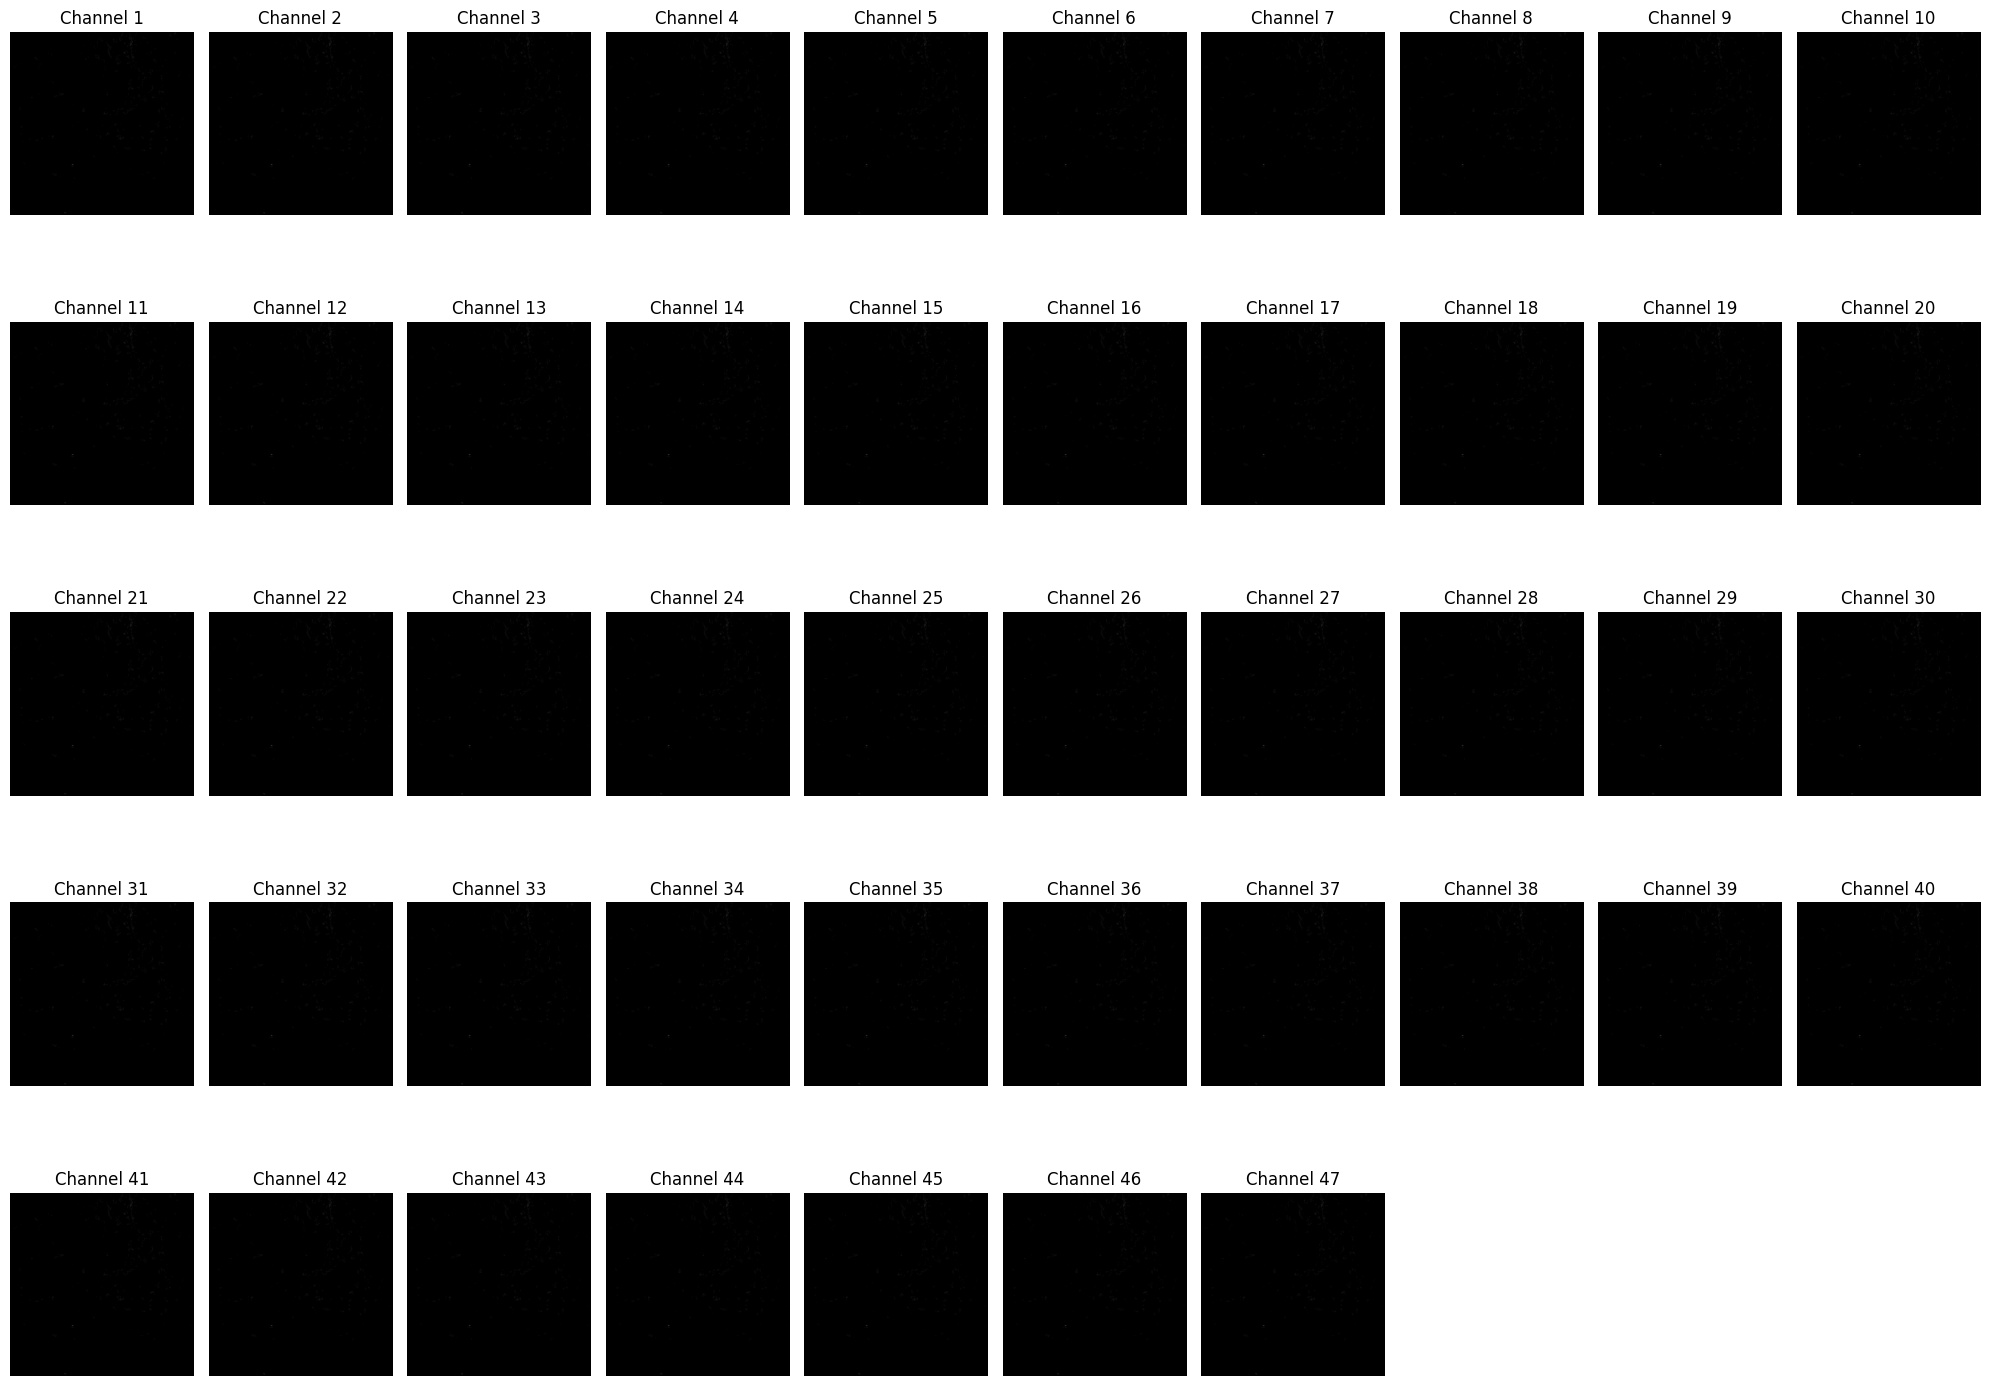

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def read_multi_page_tiff(tiff_path):
    """
    Read a multi-page TIFF image and return a list of NumPy arrays.

    Parameters:
        tiff_path (str): Path to the multi-page TIFF file.

    Returns:
        list: List of NumPy arrays, each representing a channel.
    """
    tiff_image = Image.open(tiff_path)
    num_frames = tiff_image.n_frames

    # Read each channel as a separate NumPy array
    image_channels = [np.array(tiff_image.copy()) for _ in range(num_frames)]

    return image_channels

# Example usage:
tiff_path = os.path.join(path_to_dataset, "progressor","6204.tiff")
# "47_channel_image_stack.tif"  # Replace with the path to your multi-page TIFF image
image_channels = read_multi_page_tiff(tiff_path)

# Set the figure size to display the images larger
plt.figure(figsize=(20, 15))

# Display each channel using Matplotlib in multiple rows
num_rows = 5  # Number of rows
num_cols = (len(image_channels) + num_rows - 1) // num_rows  # Calculate number of columns

for i, channel_image in enumerate(image_channels):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(channel_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Channel {i + 1}")

# Enable interactive mode for manual resizing
plt.ion()
plt.tight_layout()  # Adjust spacing between subplots
plt.show()